##### <font color = 'green'> Weather Prediction Report

##### <font color = 'grey'> Prepared by: `Olanrewaju Adegoke`

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project\\notebooks'

In [3]:
# Reserved for libraries installation

In [4]:
# Import the necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import joblib
from datetime import datetime

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_1452\3881712819.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


###### <font color = 'green'> Import the full machine learning self built pipelines by olanrewaju

In [6]:
os.chdir('C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project\\resources')

In [7]:
import olanrewaju as ola

In [8]:
dir(ola)

['LabelEncoder',
 'LogisticRegression',
 'MinMaxScaler',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'RFE',
 'RandomForestClassifier',
 'StandardScaler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'all_num_transform',
 'categorical_data',
 'change_dtype_function',
 'check_wrong_label',
 'concat_df',
 'convert_rfe_features_to_dataframe',
 'dataframe_describe',
 'dataframe_explore',
 'datetime',
 'dropping_columns',
 'duplicate_corrector',
 'feature_selection_rfe',
 'feature_target_selector',
 'file_copy_v2',
 'file_image_saver_versioning_v1',
 'file_load_v4',
 'get_dummy_encoder',
 'joblib',
 'label_encoding',
 'merging_rfe_df',
 'min_max_scaler',
 'mislabel_function_corrector_v2',
 'missing_and_duplicate_checker',
 'missing_value_corrector_v2',
 'norm_scaler',
 'np',
 'numerical_data',
 'one_hot_encoding',
 'ordinal_encoding',
 'os',
 'outliers_correction_iqr',
 'pd',
 'plotting_outliers',
 'plt',
 'saving

###### Load the dataset

In [9]:
os.chdir('C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project\\data')

In [10]:
help(ola.file_load_v4)

Help on function file_load_v4 in module olanrewaju:

file_load_v4(main_path, file_path, file_name, file_format)
    This is a file loader function that implements file I/O for the following file formats:
        1. .csv
        2. xlsx or xls
    Inputs:
        order: (main_path, file_path, file_name, file_format)
        main_path: This is the string directory to file location. It is the parent folder that contain the folder that housed the dataset.
        file_path: This is the path to the directory that housed the data written out in string.
        file_name: This is the name of the data or file without the file extension and must be in string also.
        file_format: This is the format of the file you are trying to upload. It can be a csv, xlsx or xls.
                     Please do not add the '.' at the prefix or suffix of any of the file format.

    Outputs:
        The function returns a pandas DataFrame.
        Remember to create a container for the outputs.



In [11]:
main_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
file_path = 'data'
file_name = 'weatherData'
file_format = 'csv'
data = ola.file_load_v4(main_path, file_path, file_name, file_format)
data.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2/13/2011,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2/16/2011,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2/18/2011,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,3/3/2011,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,3/16/2011,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


In [12]:
os.chdir('C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project\\notebooks')

###### Explore the data

In [13]:
help(ola.dataframe_explore)

Help on function dataframe_explore in module olanrewaju:

dataframe_explore(file_name)
    This function provides quick overview of any given dataframe.
    Input:
        file_name: This is the dataset that is loaded into the jupyter notebook.

    Outputs:
        info: This shows the information about the dataset.
        shape: This shows the dimension of the dataset.



In [14]:
file_name = data
ola.dataframe_explore(file_name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  4525 non-null   object 
 1   temperaturemin        4524 non-null   float64
 2   temperaturemax        4524 non-null   float64
 3   precipitation         4524 non-null   float64
 4   snowfall              4523 non-null   float64
 5   snowdepth             4523 non-null   float64
 6   avgwindspeed          4523 non-null   float64
 7   fastest2minwinddir    4523 non-null   float64
 8   fastest2minwindspeed  4524 non-null   float64
 9   fastest5secwinddir    4507 non-null   float64
 10  fastest5secwindspeed  4507 non-null   float64
 11  fog                   4525 non-null   object 
 12  fogheavy              4525 non-null   object 
 13  mist                  4525 non-null   object 
 14  rain                  4525 non-null   object 
 15  fogground            

In [15]:
help(ola.dataframe_describe)

Help on function dataframe_describe in module olanrewaju:

dataframe_describe(file_name)
    This function provides quick statistical overview of any given dataframe.
    Input:
        file_name: This is the dataset that is loaded into the jupyter notebook.

    Output:
        stat: This shows the statistical description about the dataset.



In [16]:
file_name = data
ola.dataframe_describe(file_name)

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed
count,4524.000000,4524.000000,4524.000000,4523.000000,4523.000000,4523.000000,4523.000000,4524.000000,4507.000000,4507.000000
mean,50.667065,71.986450,0.129841,0.013820,0.017550,5.863133,172.690692,15.934618,176.807189,21.791444
std,16.224853,16.509891,0.373752,0.215542,0.213295,2.955558,94.346321,5.237268,96.547544,7.058039
min,4.100000,23.200000,0.000000,0.000000,0.000000,0.000000,10.000000,4.920000,10.000000,6.930000
25%,37.000000,60.100000,0.000000,0.000000,0.000000,3.580000,80.000000,12.970000,90.000000,17.000000
50%,52.000000,73.900000,0.000000,0.000000,0.000000,5.370000,210.000000,14.990000,210.000000,21.030000
75%,66.000000,86.000000,0.050000,0.000000,0.000000,7.610000,240.000000,18.120000,240.000000,25.050000
max,80.100000,105.100000,6.450000,7.010000,5.910000,20.360000,360.000000,59.950000,360.000000,86.120000


In [17]:
data.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2/13/2011,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2/16/2011,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2/18/2011,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,3/3/2011,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,3/16/2011,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


In [18]:
def date_to_datetime_format(file, date_column):
    '''
    This function checks the datatype of the date column in a given pandas dataframe and if the dtype is object, it is converted to datetime format.
    Inputs:
        file: This is the pandas dataframe having the date column we are interested in checking.
        date_column: This is the name of the date column in the pandas dataframe.
    Output:
        The function returns a pandas dataframe with the date column already converted to datetime format.
    '''
    if file[date_column].dtype == 'object':
        file[date_column] = pd.to_datetime(file[date_column])
    else:
        print('You can check to see if the data type for date is object')
    return file

# Call the function
file = data
date_column = 'date'
data = date_to_datetime_format(file, date_column)
data.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


###### Extracting the required details from the datetime dtype

In [19]:
data['year'] = data['date'].dt.year
data['day_of_the_week'] = data['date'].dt.strftime('%A')
data['month'] = data['date'].dt.weekday.map(
    {1: 'January', 2: 'February', 3: 'March',
     4: 'April', 5: 'May', 6: 'June',
     7: 'July', 8: 'August', 9: 'September',
     10: 'October', 11: 'November', 12: 'December'}
)
data['quarter'] = data['date'].dt.quarter.map({1: '1st_qtr', 2: '2nd_qtr', 3: '3rd_qtr', 4: '4th_qtr'})

In [20]:
data.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,thunder,highwind,hail,blowingsnow,dust,freezingfog,year,day_of_the_week,month,quarter
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,2011,Sunday,June,1st_qtr
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,2011,Wednesday,February,1st_qtr
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,No,No,No,2011,Friday,April,1st_qtr
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,2011,Thursday,March,1st_qtr
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,2011,Wednesday,February,1st_qtr


In [21]:
sample = data.sample(1000)

In [22]:
help(ola.file_image_saver_versioning_v1)

Help on function file_image_saver_versioning_v1 in module olanrewaju:

file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)
    This function saves a pandas dataframe into a csv or excel format and also saves an image to different format with versioning using date.
    Inputs:
        main_dir: This is the parent folder for the project.
        file_name: This is the name of the data or image you want to save, written without string.
        dest_path: This is the folder name you want to save the data or image written as string.
        save_name: This is the string name you want your data or image to be save_as in your folder.
        ext: This is the format of the data if it is csv or excel or png, jpeg etc for images. It must have the '.' along with it.
    Output:
        This function will save the data or image in the specified folder respectively with a date versioning.
        You will need to check the folder specified to see if the data or image is s

The file is date_maxtemp and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Weather_Report_Project/visuals folder


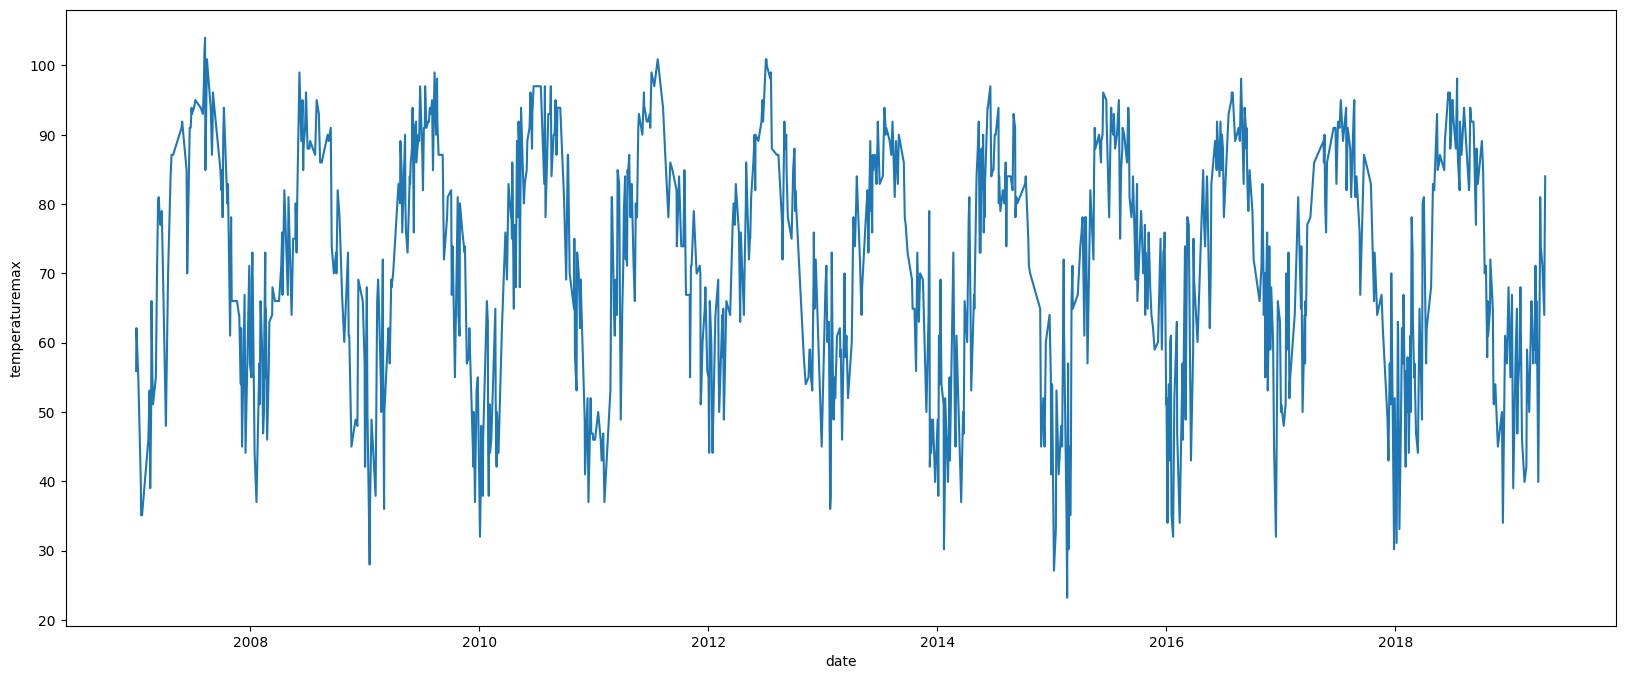

In [23]:
plt.figure(figsize=(20,8))
sb.lineplot(x=sample['date'], y=sample['temperaturemax'])

main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
file_name = sample
dest_path = 'visuals'
save_name = 'date_maxtemp'
ext = '.png'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is date_maxtemp_thunder and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Weather_Report_Project/visuals folder


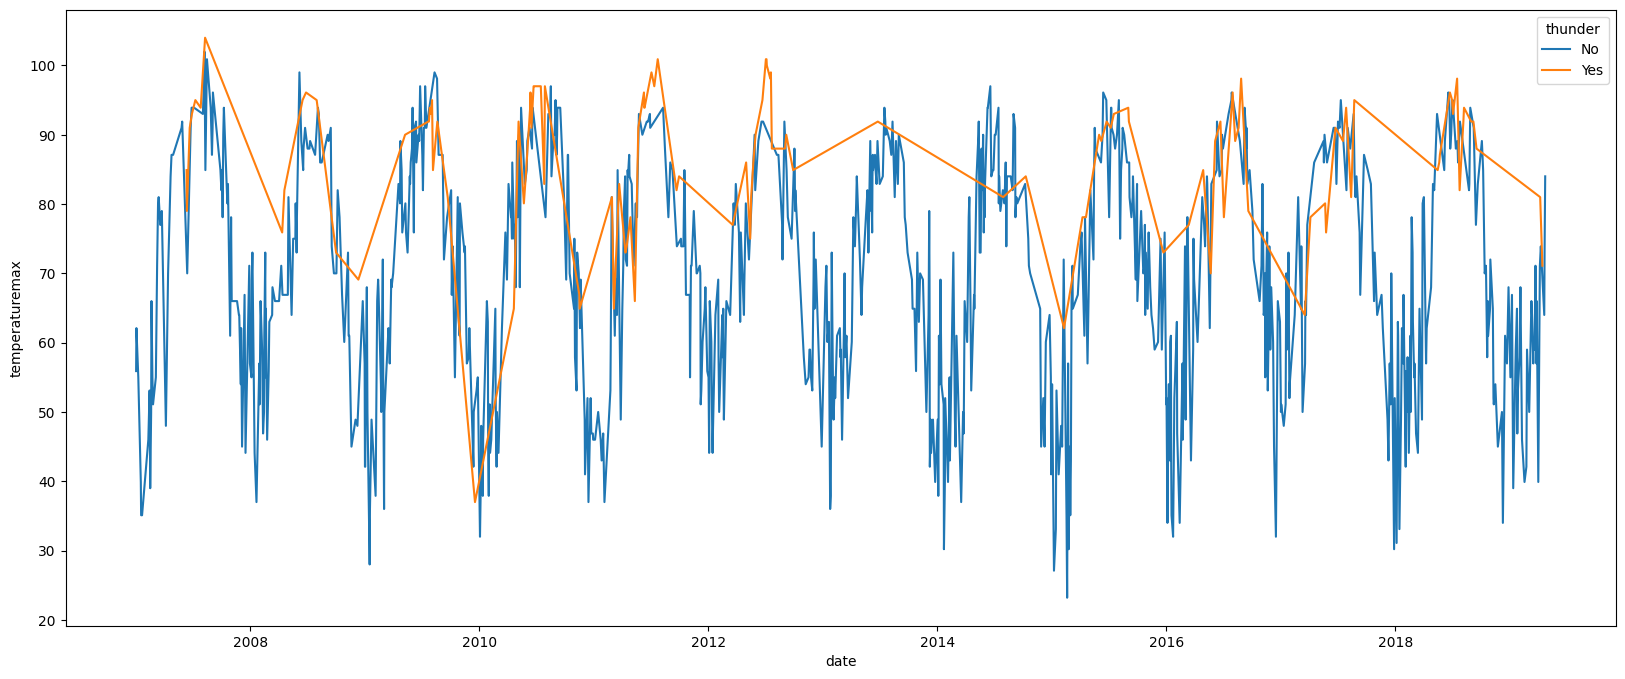

In [24]:
plt.figure(figsize=(20,8))
sb.lineplot(x=sample['date'], y=sample['temperaturemax'], hue=sample['thunder'])

main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
file_name = sample
dest_path = 'visuals'
save_name = 'date_maxtemp_thunder'
ext = '.png'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is year_maxtemp_thunder and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Weather_Report_Project/visuals folder


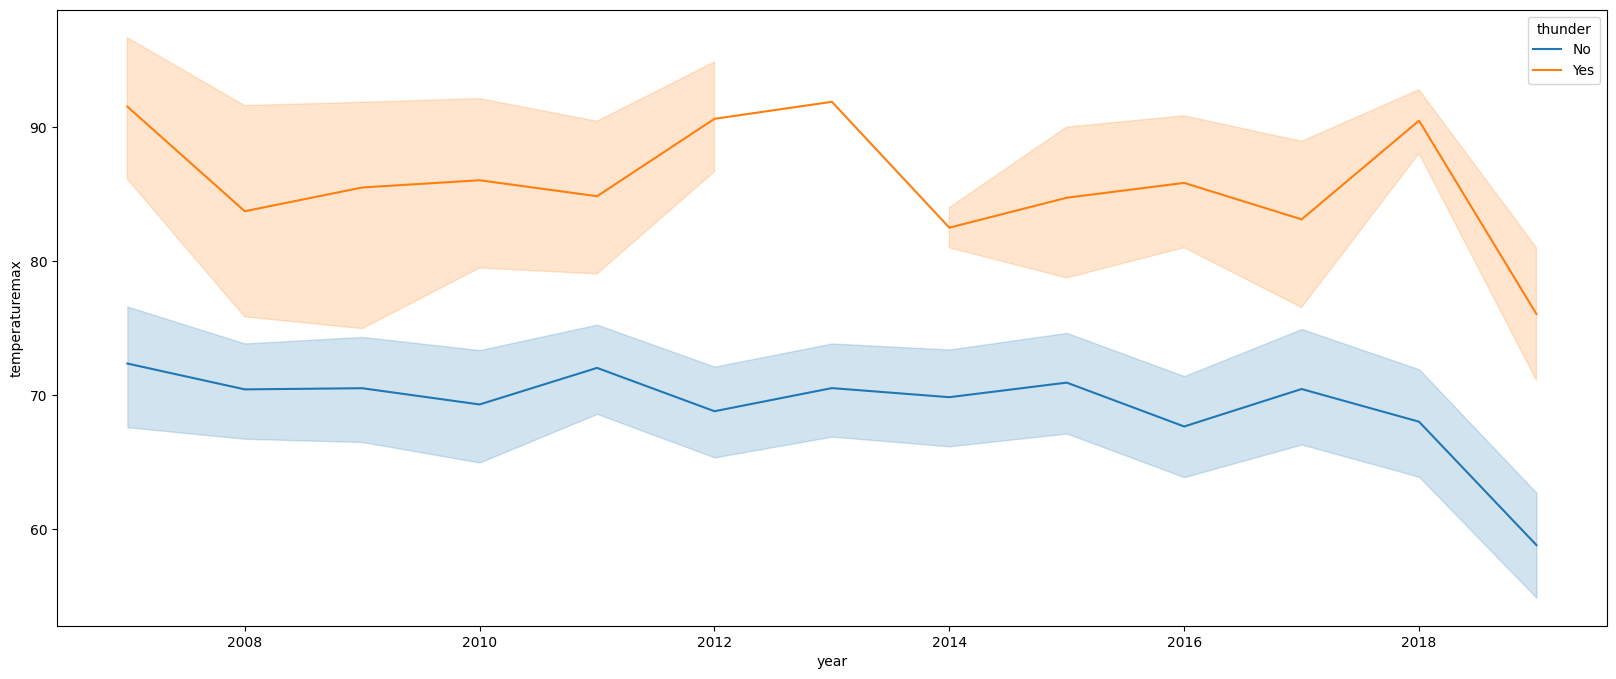

In [25]:
plt.figure(figsize=(20,8))
sb.lineplot(x=sample['year'], y=sample['temperaturemax'], hue=sample['thunder'])

main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
file_name = sample
dest_path = 'visuals'
save_name = 'year_maxtemp_thunder'
ext = '.png'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is year_maxtemp_dayofweek and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Weather_Report_Project/visuals folder


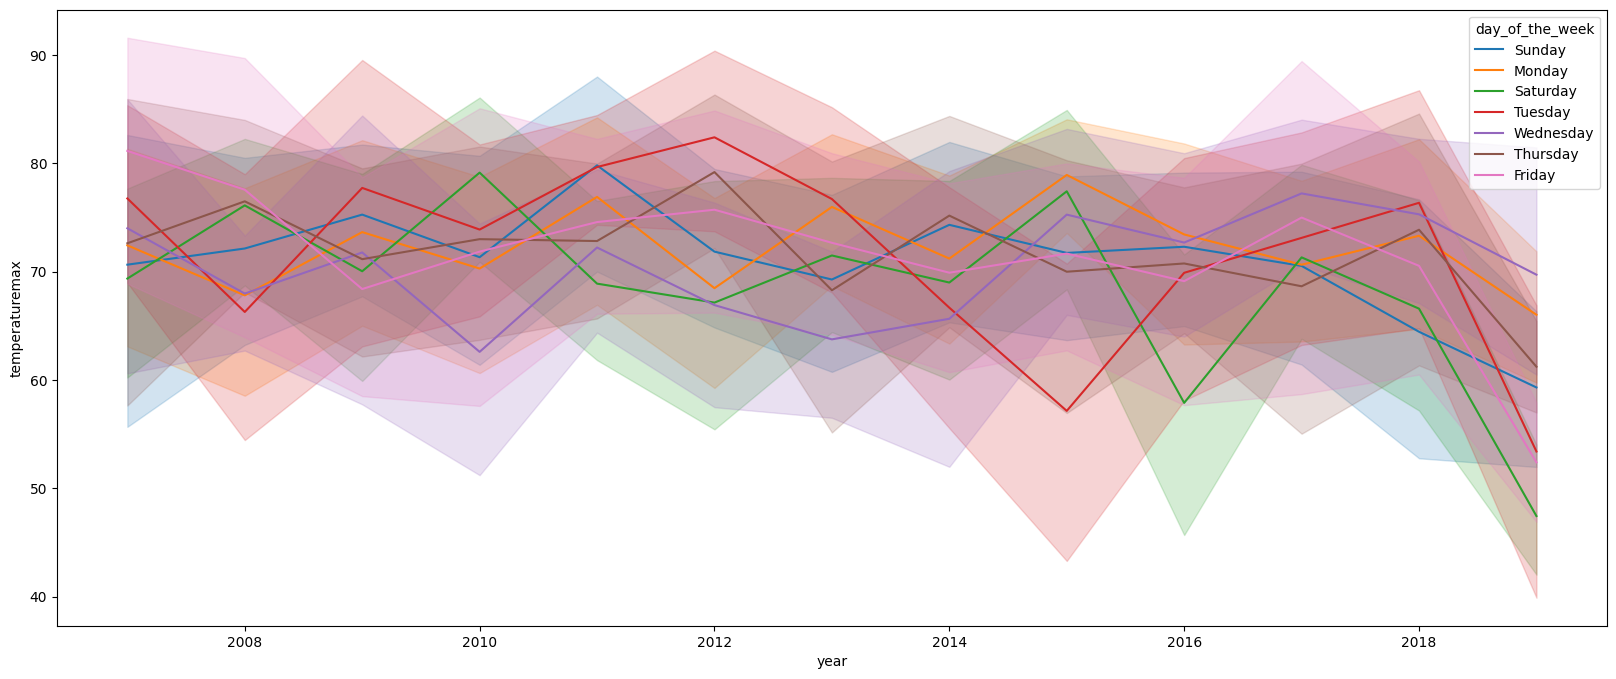

In [26]:
plt.figure(figsize=(20,8))
sb.lineplot(x=sample['year'], y=sample['temperaturemax'], hue=sample['day_of_the_week'])

main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
file_name = sample
dest_path = 'visuals'
save_name = 'year_maxtemp_dayofweek'
ext = '.png'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is year_maxtemp_month and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Weather_Report_Project/visuals folder


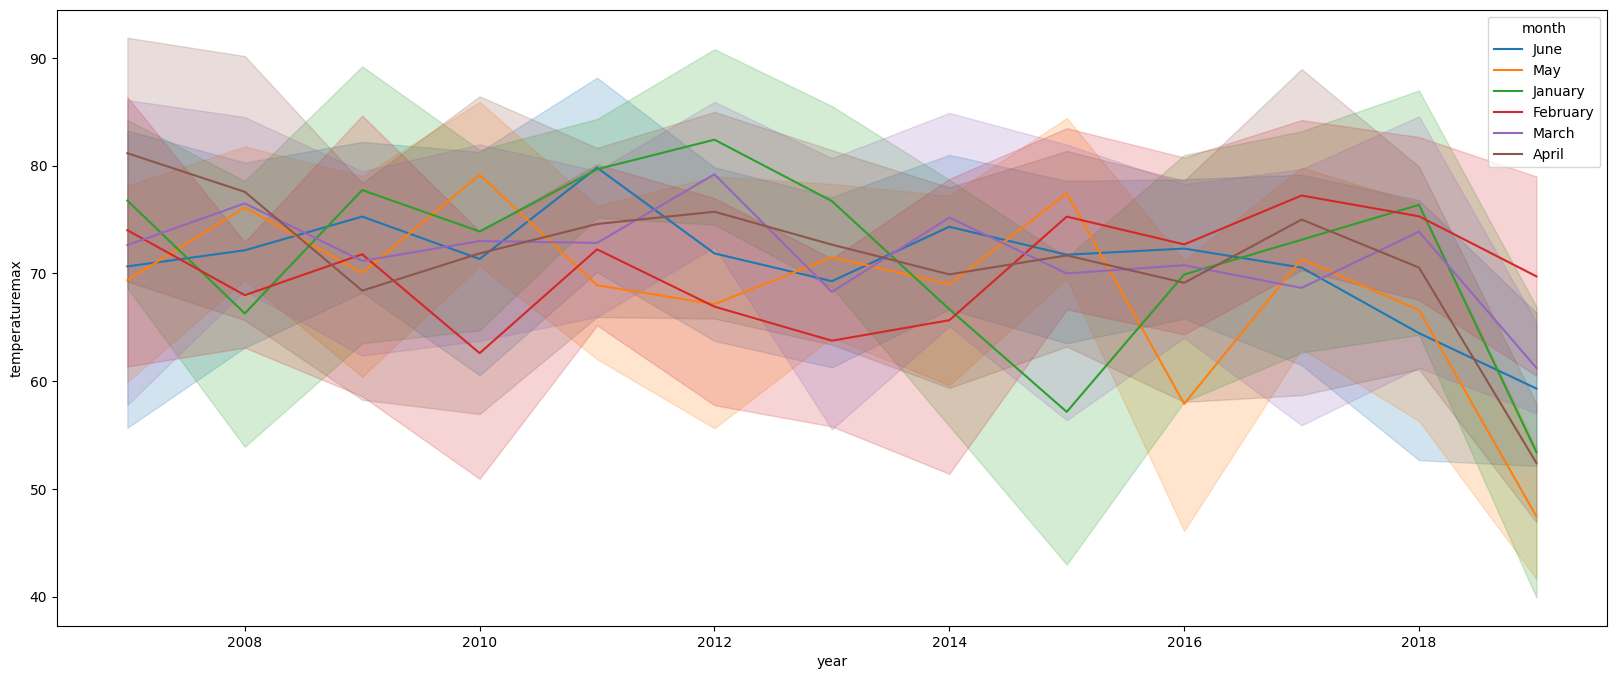

In [27]:
plt.figure(figsize=(20,8))
sb.lineplot(x=sample['year'], y=sample['temperaturemax'], hue=sample['month'])

main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
file_name = sample
dest_path = 'visuals'
save_name = 'year_maxtemp_month'
ext = '.png'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is year_maxtemp_quarter and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Weather_Report_Project/visuals folder


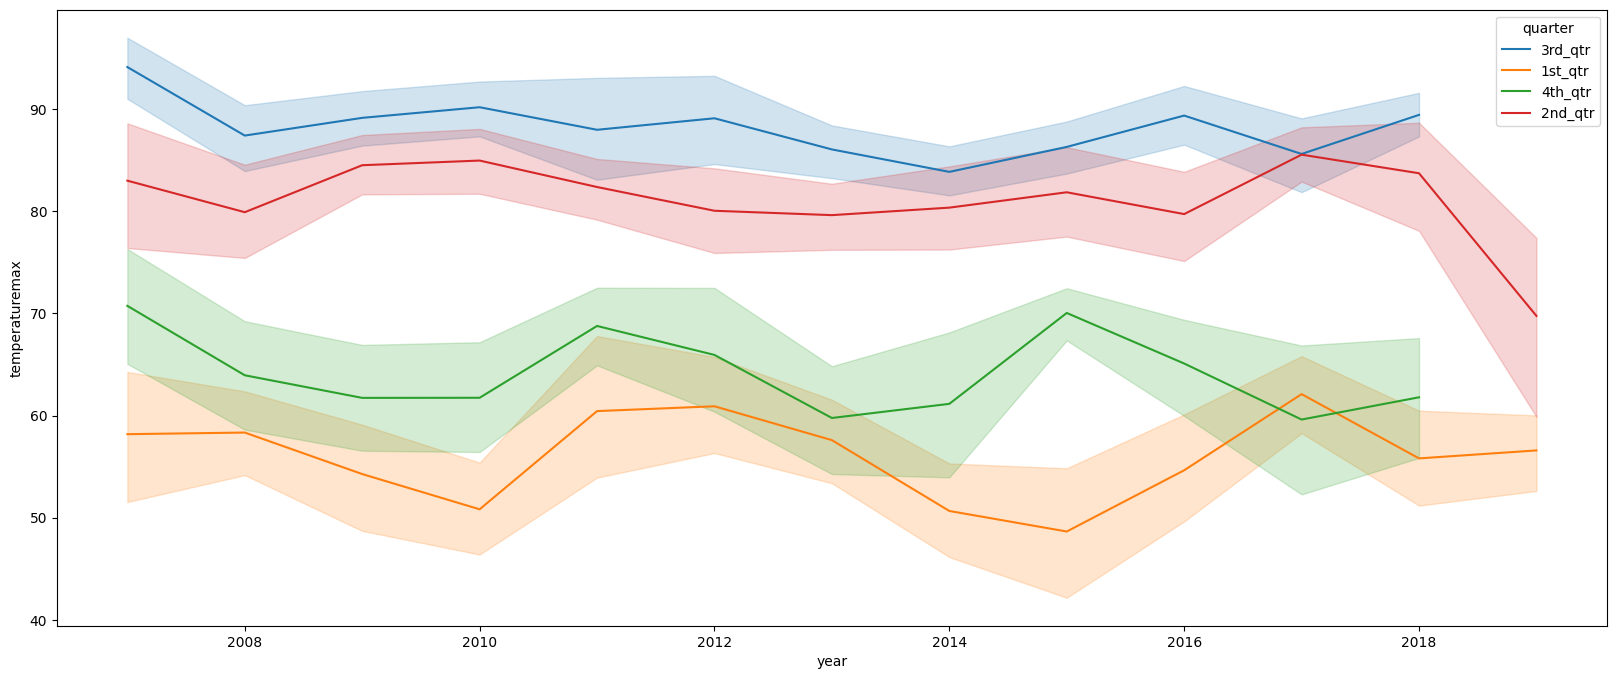

In [28]:
plt.figure(figsize=(20,8))
sb.lineplot(x=sample['year'], y=sample['temperaturemax'], hue=sample['quarter'])

main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
file_name = sample
dest_path = 'visuals'
save_name = 'year_maxtemp_quarter'
ext = '.png'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

###### We move to the machine learning preprocessing proper

In [29]:
data.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,thunder,highwind,hail,blowingsnow,dust,freezingfog,year,day_of_the_week,month,quarter
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,2011,Sunday,June,1st_qtr
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,2011,Wednesday,February,1st_qtr
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,No,No,No,2011,Friday,April,1st_qtr
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,2011,Thursday,March,1st_qtr
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,2011,Wednesday,February,1st_qtr


In [30]:
help(ola.dropping_columns)

Help on function dropping_columns in module olanrewaju:

dropping_columns(file, columns)
    This function is used to drop unwanted columns in a dataset and returns a dataframe which is not having the unwanted columns.
    This uses the inplace=True method and returns the same dataset but without the unwanted column/columns.
    Inputs:
        file: This is the dataset.
        columns: This is the list of the unwanted columns in strings.
    Output:
        This function returns a dataframe without the unwanted column/columns.



In [31]:
# Removing unwanted columns

In [32]:
file = data
columns = ['year', 'day_of_the_week', 'month', 'quarter']
data = ola.dropping_columns(file, columns)
data.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


In [33]:
help(ola.check_wrong_label)

Help on function check_wrong_label in module olanrewaju:

check_wrong_label(file)
    This function go through a dataset and returns column names and the unique labels in each columns.
    The input is the dataset itself.
    Input:
        file: This is the dataset.
    Output:
        The function print out each columns and the unique labels in the dataset.



In [34]:
file = data
ola.check_wrong_label(file)

date:<DatetimeArray>
['2011-02-13 00:00:00', '2011-02-16 00:00:00', '2011-02-18 00:00:00',
 '2011-03-03 00:00:00', '2011-03-16 00:00:00', '2011-03-19 00:00:00',
 '2011-03-21 00:00:00', '2011-03-23 00:00:00', '2011-03-30 00:00:00',
 '2011-04-01 00:00:00',
 ...
 '2019-02-27 00:00:00', '2019-03-01 00:00:00', '2019-03-03 00:00:00',
 '2019-03-05 00:00:00', '2019-03-06 00:00:00', '2019-03-15 00:00:00',
 '2019-03-17 00:00:00', '2019-03-26 00:00:00', '2019-04-09 00:00:00',
 '2019-04-23 00:00:00']
Length: 4497, dtype: datetime64[ns]
temperaturemin:[25.  34.  52.  35.1 46.9 55.9 50.  39.9 37.9 37.  46.  53.1 68.  63.
 57.9 57.  59.  66.  70.  69.1 72.  66.9 61.  54.  43.  36.  33.1 62.1
 73.9 73.  71.1 45.  31.1 28.2 48.  24.3 30.2 42.1 27.1 39.  44.1 60.1
 48.9 77.  32.  19.9 21.9 41.  30.  55.  64.9 21.  30.9 51.1 28.9 64.
 26.1 27.  75.  28.  22.1 26.2 19.2 21.2 23.2 15.3 18.1 12.2 10.2 29.1
 25.2 20.1 11.1 75.9 10.9 23.  24.1 19.  79.  16.  17.1 78.1 16.2  7.2
 13.1 17.2 18.   9.1 80.1  nan 

By eyeballing this dataset, we can observed that columns = ['fogheavy', 'rain', 'ice'] has wrong labelling and need to be corrected.

In [35]:
help(ola.mislabel_function_corrector_v2)

Help on function mislabel_function_corrector_v2 in module olanrewaju:

mislabel_function_corrector_v2(file, mislabels)
    This function goes through the dataset columns and correct for any stated mislabel in that column.
    It goes through each column automatically and identify the mislabels and correct them at once when calling the function name.
    The function correct the mislabels by using the mean strategy in columns with float or int data types,
    and uses the mode strategy for categorical columns.

    Inputs:
        file: The dataset name
        mislabels: This is a list of all identified mislabels in the dataset.

    Output:
        return a dataframe with the corrected labels in the column.



In [36]:
file = data
mislabels = ['N ', 'y ', 'n ']

data = ola.mislabel_function_corrector_v2(file, mislabels)
data.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


In [37]:
# To check if corrected
file = data
ola.check_wrong_label(file)

date:<DatetimeArray>
['2011-02-13 00:00:00', '2011-02-16 00:00:00', '2011-02-18 00:00:00',
 '2011-03-03 00:00:00', '2011-03-16 00:00:00', '2011-03-19 00:00:00',
 '2011-03-21 00:00:00', '2011-03-23 00:00:00', '2011-03-30 00:00:00',
 '2011-04-01 00:00:00',
 ...
 '2019-02-27 00:00:00', '2019-03-01 00:00:00', '2019-03-03 00:00:00',
 '2019-03-05 00:00:00', '2019-03-06 00:00:00', '2019-03-15 00:00:00',
 '2019-03-17 00:00:00', '2019-03-26 00:00:00', '2019-04-09 00:00:00',
 '2019-04-23 00:00:00']
Length: 4497, dtype: datetime64[ns]
temperaturemin:[25.  34.  52.  35.1 46.9 55.9 50.  39.9 37.9 37.  46.  53.1 68.  63.
 57.9 57.  59.  66.  70.  69.1 72.  66.9 61.  54.  43.  36.  33.1 62.1
 73.9 73.  71.1 45.  31.1 28.2 48.  24.3 30.2 42.1 27.1 39.  44.1 60.1
 48.9 77.  32.  19.9 21.9 41.  30.  55.  64.9 21.  30.9 51.1 28.9 64.
 26.1 27.  75.  28.  22.1 26.2 19.2 21.2 23.2 15.3 18.1 12.2 10.2 29.1
 25.2 20.1 11.1 75.9 10.9 23.  24.1 19.  79.  16.  17.1 78.1 16.2  7.2
 13.1 17.2 18.   9.1 80.1  nan 

In [38]:
help(ola.missing_and_duplicate_checker)

Help on function missing_and_duplicate_checker in module olanrewaju:

missing_and_duplicate_checker(file_name)
    This function provides quick statistical overview of any given dataframe.
    Input:
        file_name: This is the dataset that is loaded into the jupyter notebook.

    Outputs:
        missing_value: This shows the summary report for missing values in the dataset.
        duplicate_value: This shows the summary report for duplicated entries in the dataset.
        percent_missing_value: This shows the proportion of the missing values on the total number of entries in the data.
                                This is important for us to know if we should drop or apply other alternative to correcting the missing values.



In [39]:
file_name = data
ola.missing_and_duplicate_checker(file_name)



There are 28 duplicates entries in the dataset.

This is the percentage of the missing value in each column: 
 date                    0.000000
temperaturemin          0.022099
temperaturemax          0.022099
precipitation           0.022099
snowfall                0.044199
snowdepth               0.044199
avgwindspeed            0.044199
fastest2minwinddir      0.044199
fastest2minwindspeed    0.022099
fastest5secwinddir      0.397790
fastest5secwindspeed    0.397790
fog                     0.000000
fogheavy                0.022099
mist                    0.000000
rain                    0.022099
fogground               0.000000
ice                     0.022099
glaze                   0.000000
drizzle                 0.000000
snow                    0.000000
freezingrain            0.000000
smokehaze               0.000000
thunder                 0.000000
highwind                0.000000
hail                    0.000000
blowingsnow             0.000000
dust                    0.000

date                     0
temperaturemin           1
temperaturemax           1
precipitation            1
snowfall                 2
snowdepth                2
avgwindspeed             2
fastest2minwinddir       2
fastest2minwindspeed     1
fastest5secwinddir      18
fastest5secwindspeed    18
fog                      0
fogheavy                 1
mist                     0
rain                     1
fogground                0
ice                      1
glaze                    0
drizzle                  0
snow                     0
freezingrain             0
smokehaze                0
thunder                  0
highwind                 0
hail                     0
blowingsnow              0
dust                     0
freezingfog              0
dtype: int64

The dataset contains duplicate and missing values and needs to be corrected.

In [40]:
help(ola.missing_value_corrector_v2)

Help on function missing_value_corrector_v2 in module olanrewaju:

missing_value_corrector_v2(file)
    This function scan through a given dataset and correct the missing values in them.
    It check for the data type in each columns of the dataset. If the column is numerical, it checks whether the dtype is either float or int,
       it uses this dtype to correct for missing values using the mean strategy.
    If the column is categorical, it checks to see that the dtype is an object and correct the missing values using the mode strategy.
    This function is completely iterative.

    Input:
        file: This is the pandas dataframe.

    Output:
        The function return a cleaned dataframe without missing values.



In [41]:
file = data
data = ola.missing_value_corrector_v2(file)
data.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


In [42]:
help(ola.duplicate_corrector)

Help on function duplicate_corrector in module olanrewaju:

duplicate_corrector(file)
    This function correct the duplicates entries in the dataset
    Input:
        file: this is the dataset you want to correct the duplicates.
    Output:
        The function returns a dataframe with duplicates completely removed from the dataset, keeping the its first entry.



In [43]:
file = data
data = ola.duplicate_corrector(file)
data.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


In [44]:
help(ola.plotting_outliers)

Help on function plotting_outliers in module olanrewaju:

plotting_outliers(file)
    This function only plot the outliers in the dataset.
    Input:
        file: This is the pandas dataframe.
    Output:
        The function returns a plot of the outliers.



<Axes: ylabel='temperaturemin'>

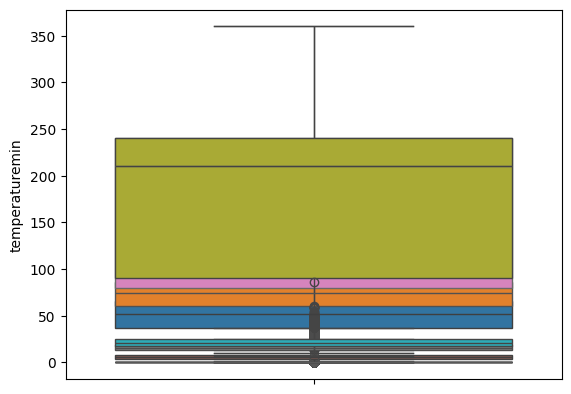

In [45]:
file = data
ola.plotting_outliers(file)

<Axes: ylabel='temperaturemin'>

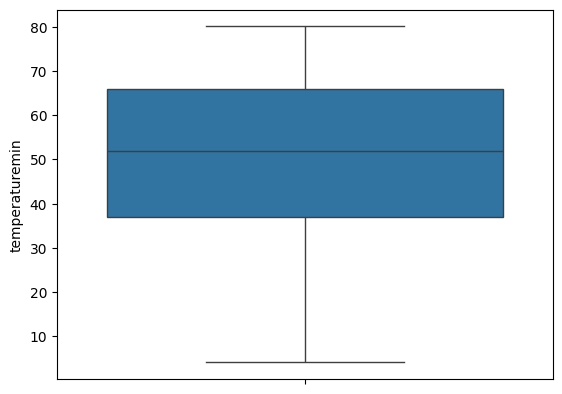

In [46]:
sb.boxplot(data['temperaturemin'])

In [47]:
help(ola.outliers_correction_iqr)

Help on function outliers_correction_iqr in module olanrewaju:

outliers_correction_iqr(file, iqr_multiplier=1.5)
    This function correct outliers in a DataFrame using the interquartile range (IQR) strategy with an automatic strategy selection.

    Inputs:
        file: This is the dataset in pandas. This contains both numerical and categorical columns.
        iqr_multiplier: This is constant factor multiplier for IQR and is float, optional (default=1.5)
        The multiplier determines the threshold for identifying outliers based on IQR.

    Returns:
        DataFrame: It returns a pandas dataframe without outliers.
        DataFrame with outliers corrected based on automatically selected strategy.



In [48]:
file = data
data = ola.outliers_correction_iqr(file, iqr_multiplier=1.5)
data.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


<Axes: ylabel='temperaturemin'>

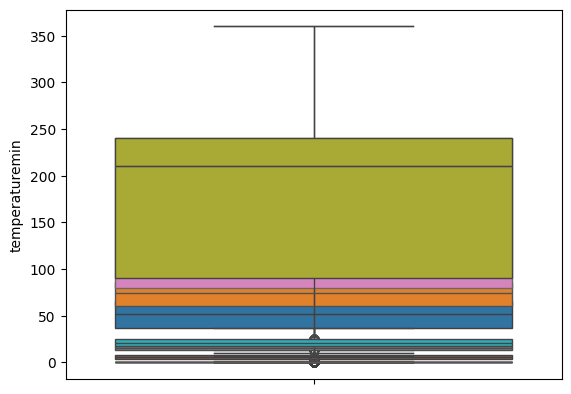

In [49]:
file = data
ola.plotting_outliers(file)

###### Saving the cleaned dataset

In [50]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
file_name = data
dest_path = 'outputs'
save_name = 'cleaned_weather_data'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is cleaned_weather_data and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Weather_Report_Project/outputs folder


###### Features and Target Selection

In [51]:
help(ola.feature_target_selector)

Help on function feature_target_selector in module olanrewaju:

feature_target_selector(file, target_col)
    This function select features and target from a given DataFrame based on the target column specified.
    Inputs:
        file: This is the dataset in pandas dataframe.
        target_col: This is the specified target column name in strings.
    Outputs:
        file: This is the pandas dataframe for all the features selected.
        target: This is the pandas dataframe for the target selected.

    Please note: When calling the function, you will need to specify the name for your features and target and must be the outputs containers.



In [52]:
file = data
target_col = 'snow'
features, target = ola.feature_target_selector(file, target_col)

In [53]:
features.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,glaze,drizzle,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


In [54]:
target.head()

,snow
0,No
1,No
2,No
3,No
4,No


In [55]:
target['snow'].value_counts()

snow
No     4478
Yes      47
Name: count, dtype: int64

There is class imbalance in this dataset especially on the target variable.

The model will be build using this dataset and we adopt the methods discussed here: 
[data_imbalance](https://semaphoreci.com/blog/imbalanced-data-machine-learning-python) to correct the data imbalance and retrain the model again.

###### Selecting Numerical and Categorical data from the features

In [56]:
help(ola.numerical_data)

Help on function numerical_data in module olanrewaju:

numerical_data(file)
    This function select ONLY numerical columns of dtype float and int from a given dataset.
    Input:
        file: This is the pandas dataframe.
    Output:
        This returns a numerical dataframe in the dataset.



In [57]:
file = features
num_data = ola.numerical_data(file)
num_data.head()

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed
0,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,23.94
1,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,21.92
2,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,23.04
3,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,29.08
4,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,14.09


The file is num_data_corr_matrix and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Weather_Report_Project/visuals folder


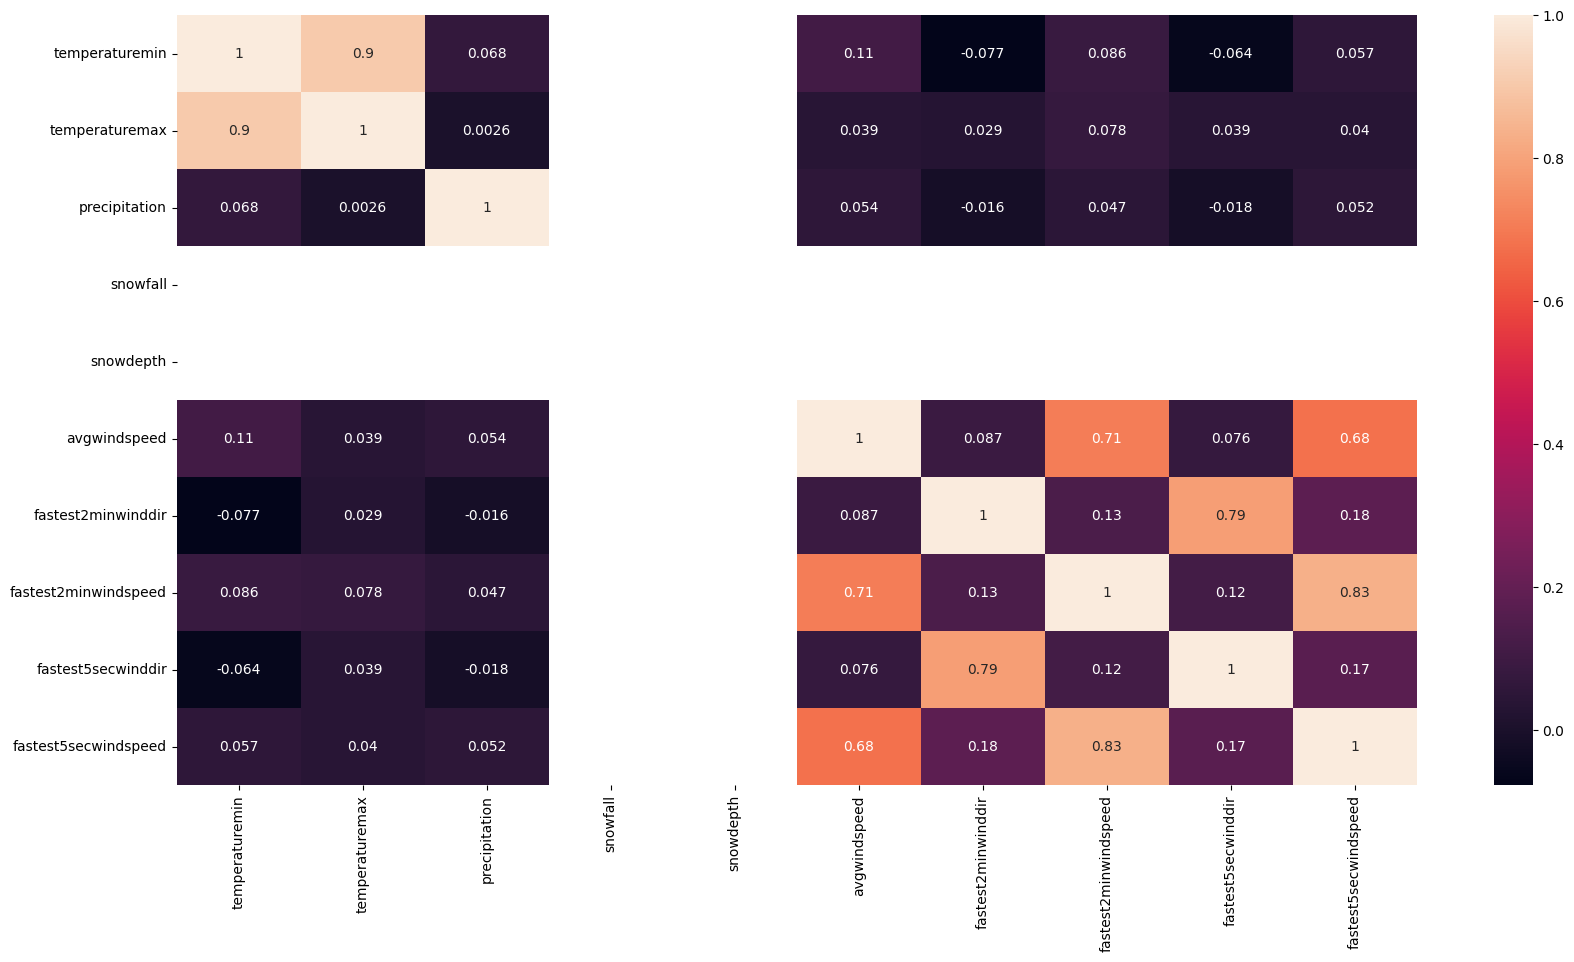

In [58]:
plt.figure(figsize=(20, 10))
sb.heatmap(num_data.corr(),annot=True)

main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
file_name = num_data
dest_path = 'visuals'
save_name = 'num_data_corr_matrix'
ext = '.png'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

In [59]:
help(ola.categorical_data)

Help on function categorical_data in module olanrewaju:

categorical_data(file)
    This function select ONLY categorical columns of dtype object from a given dataset.
    Input:
        file: This is the pandas dataframe.
    Output:
        This returns a categorical dataframe in the dataset.



In [60]:
file = data
cat_data = ola.categorical_data(file)
cat_data.head()

,fog,fogheavy,mist,rain,fogground,ice,glaze,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Yes,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No


In [61]:
# transform num_data

In [62]:
help(ola.all_num_transform)

Help on function all_num_transform in module olanrewaju:

all_num_transform(file)
    This function transform the numerical columns into transformed values using all the sklearn preprocessing libraries.
    This will transform the pandas dataframe first with minmax, standardscaler and then normalizer.
    Input:
        file: This is pandas dataframe containing ONLY the numerical columns.
    Output:
        This returns the transformed pandas dataframe for all numerical columns in the dataset.

    Please note: This maybe adopted depending on the choice of the dataset you are working with, especially when trying to observe the impact of all
                 the numerical transformers on the dataset.



In [63]:
file = num_data
num_data = ola.all_num_transform(file)
num_data.head()

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed
0,-0.748121,-0.314695,-0.143874,0.0,0.0,0.219756,0.287293,0.305370,0.211965,0.227094
1,-0.641101,-0.339697,-0.189868,0.0,0.0,-0.074836,0.379137,0.402994,0.344491,0.084393
2,0.033946,0.153004,-0.125707,0.0,0.0,0.781959,0.251017,0.266812,0.442467,0.134909
3,-0.277908,-0.331346,-0.088121,0.0,0.0,0.548156,-0.315304,0.407337,-0.290978,0.393355
4,-0.067151,-0.139906,0.637509,0.0,0.0,-0.301305,0.298336,-0.363526,0.369734,-0.347643


In [64]:
# transform the cat_data using OneHotEncoding since we are not considering order

In [65]:
help(ola.one_hot_encoding)

Help on function one_hot_encoding in module olanrewaju:

one_hot_encoding(file)
    This function encodes categorical columns in pandas dataframe using sklearn preprocessing library OneHotEncoder.
    Input:
        file: This is the pandas dataframe containing ONLY categorical columns.
    Output:
        It returns a fully encoded dataframe as zeros and ones for all the categorical columns.



In [66]:
file = cat_data
cat_data = ola.one_hot_encoding(file)
cat_data.head()

,fog_No,fog_Yes,fogheavy_No,fogheavy_Yes,mist_No,mist_Yes,rain_No,rain_Yes,fogground_No,fogground_Yes,...,highwind_No,highwind_Yes,hail_No,hail_Yes,blowingsnow_No,blowingsnow_Yes,dust_No,dust_Yes,freezingfog_No,freezingfog_Yes
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [67]:
# transform the target using Label encoder

In [68]:
help(ola.ordinal_encoding)

Help on function ordinal_encoding in module olanrewaju:

ordinal_encoding(file)
    This function encodes categorical columns in pandas dataframe using sklearn preprocessing library OrdinalEncoder.
    Input:
        file: This is the pandas dataframe containing ONLY categorical columns.
    Output:
        It returns a fully encoded dataframe as ordered based on the labels in each columns for all the categorical columns.



In [69]:
file = target
target_encoded = ola.ordinal_encoding(file)
target_encoded.head()

,snow
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


###### Concatenate the transform the dataset

In [70]:
help(ola.concat_df)

Help on function concat_df in module olanrewaju:

concat_df(df)
    This function is used to merge two or more pandas dataframe together to become a new one. It uses the columns to merge.
    The condition to use this function is that, the numbers of rows must be the same for all the dataframes to be merged.
    This function is very useful when trying to concatenate num_data, cat_data and target_data that are splitted from a single dataset during
    transformation and encoding.
    Input:
        df: These are the different pandas dataframes having the same number of rows to be merged.
    Output:
        The function returns a merged pandas dataframe as output.



In [71]:
df = [num_data, cat_data, target_encoded]
data_merged = ola.concat_df(df)
data_merged.head()

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed,...,highwind_Yes,hail_No,hail_Yes,blowingsnow_No,blowingsnow_Yes,dust_No,dust_Yes,freezingfog_No,freezingfog_Yes,snow
0,-0.748121,-0.314695,-0.143874,0.0,0.0,0.219756,0.287293,0.305370,0.211965,0.227094,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.641101,-0.339697,-0.189868,0.0,0.0,-0.074836,0.379137,0.402994,0.344491,0.084393,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.033946,0.153004,-0.125707,0.0,0.0,0.781959,0.251017,0.266812,0.442467,0.134909,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.277908,-0.331346,-0.088121,0.0,0.0,0.548156,-0.315304,0.407337,-0.290978,0.393355,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.067151,-0.139906,0.637509,0.0,0.0,-0.301305,0.298336,-0.363526,0.369734,-0.347643,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [72]:
# save the transformed dataset

In [73]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
file_name = data_merged
dest_path = 'outputs'
save_name = 'transformed_weather_data'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is transformed_weather_data and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Weather_Report_Project/outputs folder


###### Train and Score a model

In [74]:
help(ola.train_and_score_model)

Help on function train_and_score_model in module olanrewaju:

train_and_score_model(file, model_name, target_column)
    This function split the pandas dataframe into features and target and convert them into array.
    It uses the train_test_split library from sklearn to split the features and target into training and test set for training a mode.
    It iteratively uses the defined seedSearch on the train_test_split to fit, predict and score a training model on a range of seeds
    and select the seed that gives best score which measures its performance.

    Inputs:
        file: This is the pandas dataframe to train a model on.
        model_name: This is the model to be use for training the dataset depending on the use case and the dataset.
        target_column: This is the target column i.e the column to be predicted from the pandas dataframe.

    Output:
        This function returns a list consisting of the best accuracy and the best seed from the loop of various seeds.
     

In [75]:
from sklearn.linear_model import LogisticRegression
file = data_merged
model_name = LogisticRegression()
target_column = 'snow'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 1.0 | best_seed is: 0


[1.0, 0]

In [76]:
help(ola.saving_model_versions)

Help on function saving_model_versions in module olanrewaju:

saving_model_versions(main_dir, model, path, save_model_name, ext)
    This function save any predictive models into a pickle file.
    Inputs:
        main_dir: This is the parent folder for the project which is a string i.e the folder where the folder you want to save the model in is created.
        model: This is the predictive model used to train the data. Must be called without enclosing in quotation marks.
        path: This is the folder name where you want to save the model. Must be string.
        save_model_name: This is the name the model is saved with, also in strings. The user defines the name of choice.
        ext: This is the format the user want the model to be saved into. Because Joblib is the library used,
              we adopt '.pk' for pickle, also in   strings.
    Output:
        The function automatically save the model and print a statement that confirm that it is saved in the folder specified.



In [77]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
model = model_name
path = 'models'
save_model_name = 'LogReg_model'
ext = '.pk'
ola.saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is LogReg_model and is saved in the models folder


In [78]:
from sklearn.ensemble import RandomForestClassifier
file = data_merged
model_name = RandomForestClassifier()
target_column = 'snow'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 1.0 | best_seed is: 0


[1.0, 0]

In [79]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
model = model_name
path = 'models'
save_model_name = 'RF_model'
ext = '.pk'
ola.saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is RF_model and is saved in the models folder


###### Using Recursive features elimination to select important features

In [80]:
help(ola.feature_selection_rfe)

Help on function feature_selection_rfe in module olanrewaju:

feature_selection_rfe(file, model_name, num_of_features, target_column)
    This function uses the recursive features elimination to select the important features based on the number of features specified by user.
    It split the pandas dataframe into features and target columns and convert them into arrays.
    Inputs:
        file: This is the pandas dataframe and it is the cleaned dataframe obtained after data cleaning up to encoding and transforming.
        model_name: This is the model to be used by the rfe in selecting the important features and it solely depends on the use case.
        num_of_features: This is the total number of important features you want to select from the pandas dataframe that significantly contribute
        to the prediction of the target. it must be a single value defined as a list.
        target_column: This is the target column from the pandas dataframe and must be a string.
    Output:
 

In [81]:
file = data_merged
model_name = LogisticRegression()
num_of_features = [22]
target_column = 'snow'
selected_arr_feat = ola.feature_selection_rfe(file, model_name, num_of_features, target_column)
selected_arr_feat

Num of features is 22


array([ True,  True,  True, False, False,  True, False, False,  True,
        True,  True, False, False,  True, False, False,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False, False, False, False,  True,  True, False,
       False, False,  True, False,  True, False,  True, False])

In [82]:
help(ola.convert_rfe_features_to_dataframe)

Help on function convert_rfe_features_to_dataframe in module olanrewaju:

convert_rfe_features_to_dataframe(file, selected_features)
    This function convert the important array features selected by rfe into a pandas dataframe.
    Inputs:
        file: This is the pandas dataframe and it is the cleaned dataframe obtained after data cleaning up to encoding and transforming.
        selected_features: This is the rfe selected features as defined by the support_ library.
    Output:
        This returns the pandas dataframe ONLY the True important features as selected by rfe.



In [83]:
file = data_merged
selected_features = selected_arr_feat
rfe_22 = ola.convert_rfe_features_to_dataframe(file, selected_features)
rfe_22.head()

The selected index columns for features is/are: [0, 1, 2, 5, 8, 9, 10, 13, 16, 17, 18, 20, 21, 22, 24, 26, 27, 33, 34, 38, 40, 42]
The selected columns of features is/are: ['temperaturemin', 'temperaturemax', 'precipitation', 'avgwindspeed', 'fastest5secwinddir', 'fastest5secwindspeed', 'fog_No', 'fogheavy_Yes', 'rain_No', 'rain_Yes', 'fogground_No', 'ice_No', 'ice_Yes', 'glaze_No', 'drizzle_No', 'snow_No', 'snow_Yes', 'thunder_Yes', 'highwind_No', 'blowingsnow_No', 'dust_No', 'freezingfog_No']


,temperaturemin,temperaturemax,precipitation,avgwindspeed,fastest5secwinddir,fastest5secwindspeed,fog_No,fogheavy_Yes,rain_No,rain_Yes,...,ice_Yes,glaze_No,drizzle_No,snow_No,snow_Yes,thunder_Yes,highwind_No,blowingsnow_No,dust_No,freezingfog_No
0,-0.748121,-0.314695,-0.143874,0.219756,0.211965,0.227094,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,-0.641101,-0.339697,-0.189868,-0.074836,0.344491,0.084393,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.033946,0.153004,-0.125707,0.781959,0.442467,0.134909,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
3,-0.277908,-0.331346,-0.088121,0.548156,-0.290978,0.393355,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,-0.067151,-0.139906,0.637509,-0.301305,0.369734,-0.347643,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [84]:
help(ola.merging_rfe_df)

Help on function merging_rfe_df in module olanrewaju:

merging_rfe_df(file, target_column, rfe_df)
    This function is use to merge the converted important features by rfe and the target to form a pandas dataframe having only the important features
    and the target column.
    Inputs:
        file: This is the pandas dataframe and it is the cleaned dataframe obtained after data cleaning up to encoding and transforming.
        target_column: This is the target column to be predicted from the dataframe.
        rfe_df: This is the pandas dataframe obtained from the converted_rfe_features_to_dataframe.
    Output:
        This returns the pandas dataframe consisting of ONLY the important features and the target column.



In [85]:
file = data_merged
target_column = 'snow'
rfe_df = rfe_22
rfe_22_df = ola.merging_rfe_df(file, target_column, rfe_df)
rfe_22_df.head()

,temperaturemin,temperaturemax,precipitation,avgwindspeed,fastest5secwinddir,fastest5secwindspeed,fog_No,fogheavy_Yes,rain_No,rain_Yes,...,glaze_No,drizzle_No,snow_No,snow_Yes,thunder_Yes,highwind_No,blowingsnow_No,dust_No,freezingfog_No,snow
0,-0.748121,-0.314695,-0.143874,0.219756,0.211965,0.227094,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,-0.641101,-0.339697,-0.189868,-0.074836,0.344491,0.084393,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,0.033946,0.153004,-0.125707,0.781959,0.442467,0.134909,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,-0.277908,-0.331346,-0.088121,0.548156,-0.290978,0.393355,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,-0.067151,-0.139906,0.637509,-0.301305,0.369734,-0.347643,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [86]:
# Save the rfe_22 dataframe

In [87]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
file_name = rfe_22_df
dest_path = 'outputs'
save_name = 'rfe_22_weather_data'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is rfe_22_weather_data and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Weather_Report_Project/outputs folder


###### Train and score a model with rfe_22 dataset

In [88]:
from sklearn.ensemble import RandomForestClassifier
file = rfe_22_df
model_name = RandomForestClassifier()
target_column = 'snow'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 1.0 | best_seed is: 0


[1.0, 0]

In [89]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
model = model_name
path = 'models'
save_model_name = 'rfe_22_model'
ext = '.pk'
ola.saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is rfe_22_model and is saved in the models folder


##### <font color = 'red'> Correcting data Imbalance

Our focus for data imbalance lies on the target variables. If the target variables is having a high number of imbalance, it is best to correct it before building the model.

In [90]:
rfe_22_df.head()

,temperaturemin,temperaturemax,precipitation,avgwindspeed,fastest5secwinddir,fastest5secwindspeed,fog_No,fogheavy_Yes,rain_No,rain_Yes,...,glaze_No,drizzle_No,snow_No,snow_Yes,thunder_Yes,highwind_No,blowingsnow_No,dust_No,freezingfog_No,snow
0,-0.748121,-0.314695,-0.143874,0.219756,0.211965,0.227094,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,-0.641101,-0.339697,-0.189868,-0.074836,0.344491,0.084393,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,0.033946,0.153004,-0.125707,0.781959,0.442467,0.134909,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,-0.277908,-0.331346,-0.088121,0.548156,-0.290978,0.393355,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,-0.067151,-0.139906,0.637509,-0.301305,0.369734,-0.347643,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [91]:
rfe_22_df.snow.value_counts()

snow
0.0    4478
1.0      47
Name: count, dtype: int64

In [92]:
# Selecting features and target

In [93]:
file = rfe_22_df
target_col = 'snow'
X, y = ola.feature_target_selector(file, target_col)

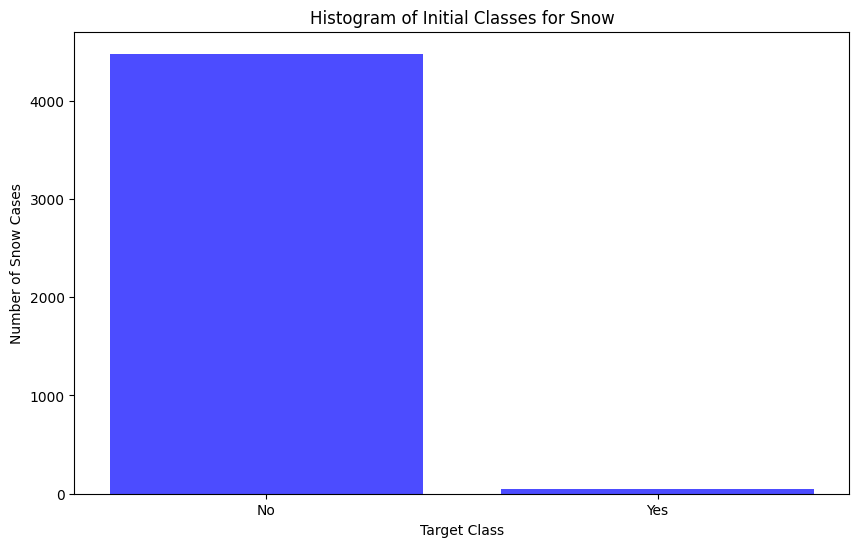

In [94]:
# Print the histogram of the initial classes
plt.figure(figsize=(10, 6))
plt.hist(y, bins=range(3), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title("Histogram of Initial Classes for Snow")
plt.xlabel("Target Class")
plt.ylabel("Number of Snow Cases")
plt.xticks(range(2), ['No', 'Yes'])
plt.show()

In [95]:
!pip install imbalanced-learn

In [96]:
from imblearn.under_sampling import RandomUnderSampler

In [97]:
seed = 42
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=seed)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

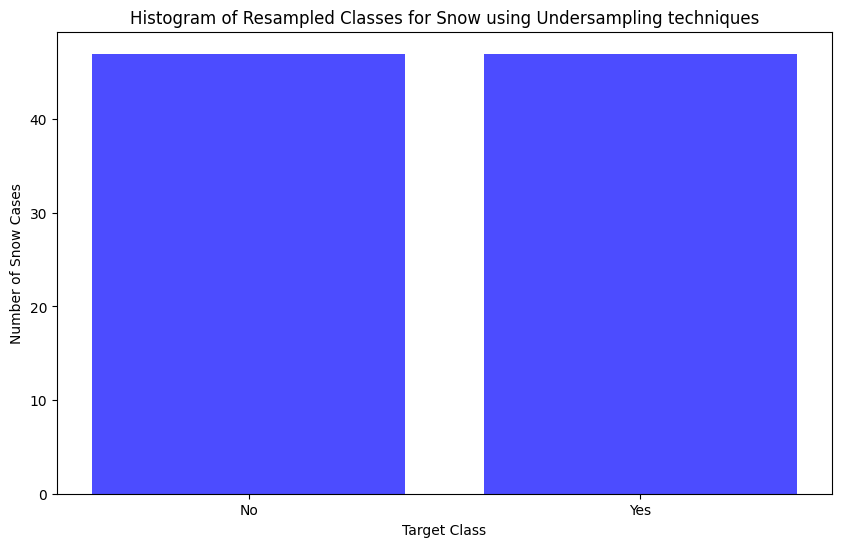

In [98]:
# Print the histogram of the resampled class
plt.figure(figsize=(10, 6))
plt.hist(y_resampled, bins=range(3), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title("Histogram of Resampled Classes for Snow using Undersampling techniques")
plt.xlabel("Target Class")
plt.ylabel("Number of Snow Cases")
plt.xticks(range(2), ['No', 'Yes'])
plt.show()

In [99]:
y_resampled.snow.value_counts()

snow
0.0    47
1.0    47
Name: count, dtype: int64

In [100]:
from imblearn.over_sampling import RandomOverSampler

In [101]:
seed = 42
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=seed)
X_over, y_over = oversampler.fit_resample(X, y)

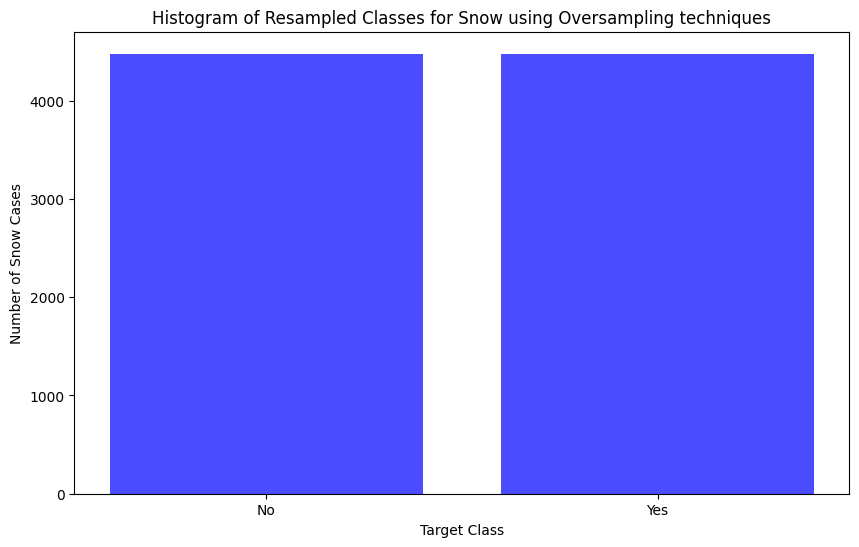

In [102]:
# Print the histogram of the resampled class
plt.figure(figsize=(10, 6))
plt.hist(y_over, bins=range(3), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title("Histogram of Resampled Classes for Snow using Oversampling techniques")
plt.xlabel("Target Class")
plt.ylabel("Number of Snow Cases")
plt.xticks(range(2), ['No', 'Yes'])
plt.show()

In [103]:
y_over.snow.value_counts()

snow
0.0    4478
1.0    4478
Name: count, dtype: int64

In [104]:
from imblearn.over_sampling import SMOTE

In [105]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

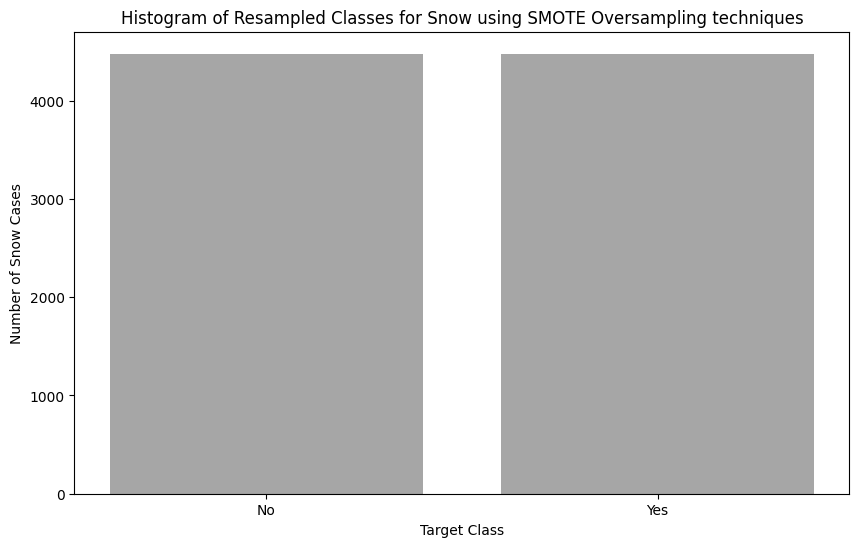

In [106]:
# Print the histogram of the resampled class
plt.figure(figsize=(10, 6))
plt.hist(y_smote, bins=range(3), align='left', rwidth=0.8, color='grey', alpha=0.7)
plt.title("Histogram of Resampled Classes for Snow using SMOTE Oversampling techniques")
plt.xlabel("Target Class")
plt.ylabel("Number of Snow Cases")
plt.xticks(range(2), ['No', 'Yes'])
plt.show()

In [107]:
y_smote.snow.value_counts()

snow
0.0    4478
1.0    4478
Name: count, dtype: int64

##### <font color = 'green'> SMOTE-ENN (Synthetic Minority Oversampling Technique - Edited Nearest Neighbors)

It combines SMOTE oversampling with the ENN undersampling technique.

It removes noisy samples from the majority class after oversampling.

In [108]:
from imblearn.combine import SMOTEENN

In [109]:
smote_enn = SMOTEENN()
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X, y)

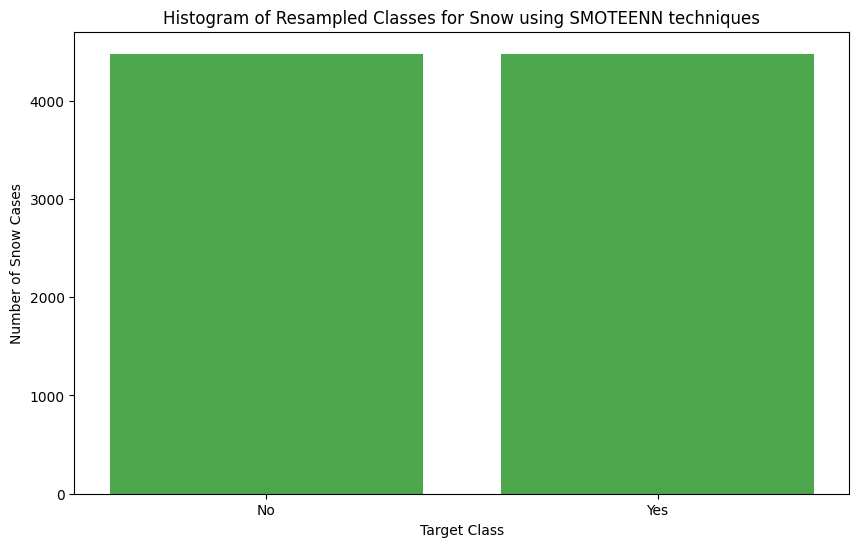

In [110]:
# Print the histogram of the resampled class
plt.figure(figsize=(10, 6))
plt.hist(y_smoteenn, bins=range(3), align='left', rwidth=0.8, color='green', alpha=0.7)
plt.title("Histogram of Resampled Classes for Snow using SMOTEENN techniques")
plt.xlabel("Target Class")


plt.ylabel("Number of Snow Cases")
plt.xticks(range(2), ['No', 'Yes'])
plt.show()

In [111]:
y_smoteenn.snow.value_counts()

snow
1.0    4478
0.0    4477
Name: count, dtype: int64

##### <font color = 'green'> We would be adopting the SMOTEENN imbalance strategy to correct the 'snow' class columns

In [112]:
# Concatenate the X and y from SMOTEENN to have a new dataframe

In [113]:
df = [X_smoteenn, y_smoteenn]
data_bal = ola.concat_df(df)
data_bal.head()

,temperaturemin,temperaturemax,precipitation,avgwindspeed,fastest5secwinddir,fastest5secwindspeed,fog_No,fogheavy_Yes,rain_No,rain_Yes,...,glaze_No,drizzle_No,snow_No,snow_Yes,thunder_Yes,highwind_No,blowingsnow_No,dust_No,freezingfog_No,snow
0,-0.748121,-0.314695,-0.143874,0.219756,0.211965,0.227094,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,-0.641101,-0.339697,-0.189868,-0.074836,0.344491,0.084393,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,0.033946,0.153004,-0.125707,0.781959,0.442467,0.134909,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,-0.277908,-0.331346,-0.088121,0.548156,-0.290978,0.393355,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,-0.067151,-0.139906,0.637509,-0.301305,0.369734,-0.347643,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [114]:
data_bal.snow.value_counts()

snow
1.0    4478
0.0    4477
Name: count, dtype: int64

###### train and score the model

In [115]:
from sklearn.linear_model import LogisticRegression
file = data_bal
model_name = LogisticRegression()
target_column = 'snow'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 1.0 | best_seed is: 0


[1.0, 0]

In [116]:
import time
starttime = time.time()
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Weather_Report_Project'
model = model_name
path = 'models'
save_model_name = 'rfe_22_data_bal_model'
ext = '.pk'
ola.saving_model_versions(main_dir, model, path, save_model_name, ext)
endtime = time.time()
print(f"The total time take is {endtime - starttime} seconds.")

The model is rfe_22_data_bal_model and is saved in the models folder
The total time take is 0.0025844573974609375 seconds.


#### Common Evaluation Metrics that affected by Imbalance data

To describe all the metrics that are affected by imbalanced data we first have to define the following:

True positive (TP). A correctly predicted value by a classifier indicating the presence of a condition or characteristic.
True negative (TN). A correctly predicted value by a classifier indicating the absence of a condition or characteristic.
False positive (FP). A wrongly predicted value by a classifier indicating that a particular condition or attribute is present when it’s not.
False negative (FN). A wrongly predicted value by a classifier indicates that a particular condition or attribute is not present when it is.


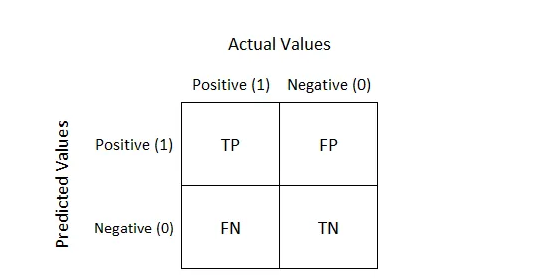

It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.alues as True and False.y.

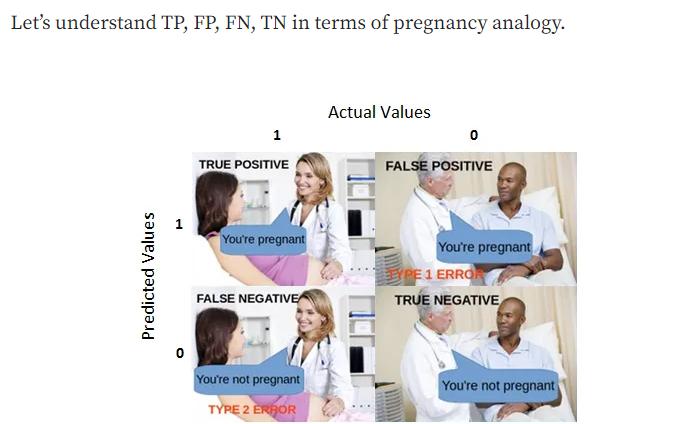

`True Positive`:

Interpretation: You predicted positive and it’s true. You predicted that a woman is pregnant and she actually is.


`True Negative`:

Interpretation: You predicted negative and it’s true. You predicted that a man is not pregnant and he actually is not.


`False Positive - Type 1 Error`:

Interpretation: You predicted positive and it’s false. You predicted that a man is pregnant but he actually is not.


`False Negative - Type 2 Error`:

Interpretation: You predicted negative and it’s false. You predicted that a woman is not pregnant but she actually is.

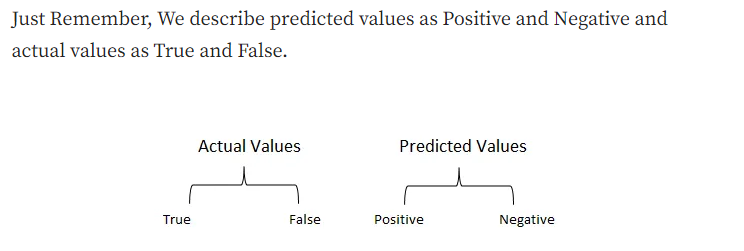

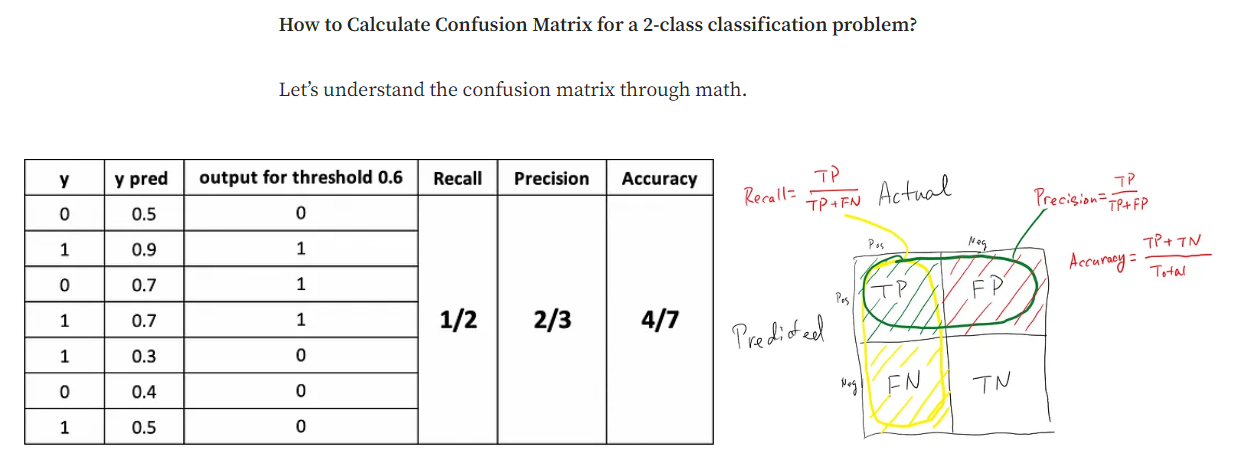

[reference](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

###### Procedures for Calcuating the metrics

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
model = LogisticRegression()
model

LogisticRegression()

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
seed = 20
X_train, X_test, y_train, y_test = train_test_split(X_smoteenn, y_smoteenn, test_size=0.3, random_state=seed)

In [121]:
model.fit(X_train, y_train)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [122]:
y_pred = model.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 0., 1.])

##### Here are the common evaluation metrics affected by imbalanced data:

`Accuracy`: It measures the ratio of correctly predicted instances to the total instances in the dataset:
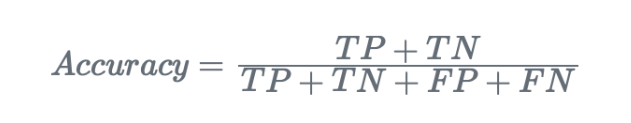

In [123]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print(f"The accuracy score is : {round((acc_score * 100),2)}%")

The accuracy score is : 100.0%


`Precision`: It measures the proportion of correctly predicted positive instances out of all predicted positive instances:
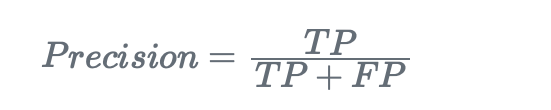

In [124]:
from sklearn.metrics import precision_score
prec_score = precision_score(y_test, y_pred)
print(f"The precision score is : {round((prec_score * 100),2)}%")

The precision score is : 100.0%


`Recall (or sensitivity)`: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances:

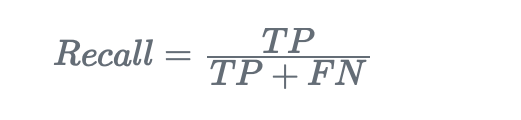

In [125]:
from sklearn.metrics import recall_score
rec_score = recall_score(y_test, y_pred)
print(f"The recall score is : {round((rec_score * 100),2)}%")

The recall score is : 100.0%


`F1 score`: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall:
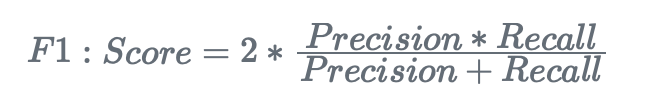

If one class is heavily dominant (the majority class), and the model is biased towards it, the F1-score may still be relatively high due to high precision but low recall for the minority class. This could misrepresent the model’s overall effectiveness.

In [126]:
from sklearn.metrics import f1_score
f_one_score = f1_score(y_test, y_pred)
print(f"The f-one score is : {round((f_one_score * 100),2)}%")

The f-one score is : 100.0%


##### Evaluation metrics not affected by data imbalance

`Confusion matrix`: A confusion matrix is a table that summarizes the performance of a classification algorithm. It provides a detailed breakdown of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). In particular, the primary diagonal (upper-left to lower-right) shows the TPs and TN. The secondary diagonal (lower-left to upper-right) shows us FP and FN. So, if an ML model is correctly classifying the data, the primary diagonal of the confusion matrix should report the highest values, while the secondary is the lowest.

In [127]:
from sklearn.metrics import confusion_matrix
# Create confusion mateix
conf_mat = confusion_matrix(y_test, y_pred)
# Print confusion matrix
print("Confusion Matrix: \n")
print(conf_mat)

Confusion Matrix: 

[[1347    0]
 [   0 1340]]


So, this confusion matrix represents a good classifier because the primary diagonal has the most results (2687 out of 2687). This means that the classifier predicts 1347 TPs and 1340 TNs.

The secondary diagonal, instead, has the lower results (0 out of 2687). This means that the classifier has predicted 0 FP and 0 FNs.
Thus, this results in a good classifier.

So, the confusion matrix provides a detailed breakdown of model performance, making it easy to see how many instances are correctly or incorrectly classified for each class in a matter of seconds.

Text(158.22222222222223, 0.5, 'ground truth')

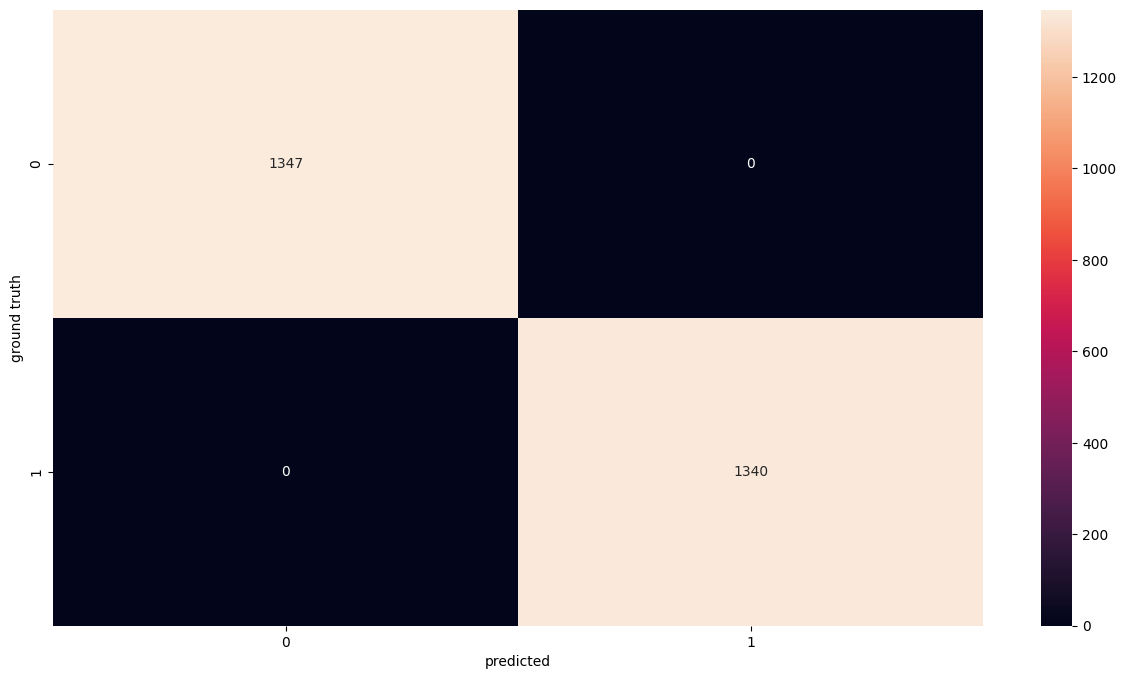

In [128]:
# Displaying the Confusion Matrix
import seaborn as sb

plt.figure(figsize=(15,8 ))

sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('ground truth')

`AUC/ROC curve`: ROC stands for “Receiver Operating Characteristic” and is a graphical way to evaluate a classifier by plotting the true positive rate (TPR) against the false positive rate (FPR) at different thresholds.
We define:

TPR as the sensitivity (which can also be called recall, as we said).
FPR as 1-specificity.

Specificity is the ability of a classifier to find all the negative samples:

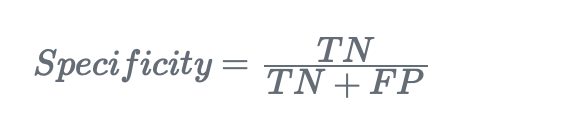

`AUC`, instead, stands for “Area Under Curve” and represents the area under the ROC curve. So this is an overall performance method, ranging from 0 to 1 (where 1 means the classifier predicts 100% of the labels as the actual values), and it’s more suitable when comparing different classifiers.

Suppose we’re studying a binary classification problem. This is how we can plot an AUC curve in Python:

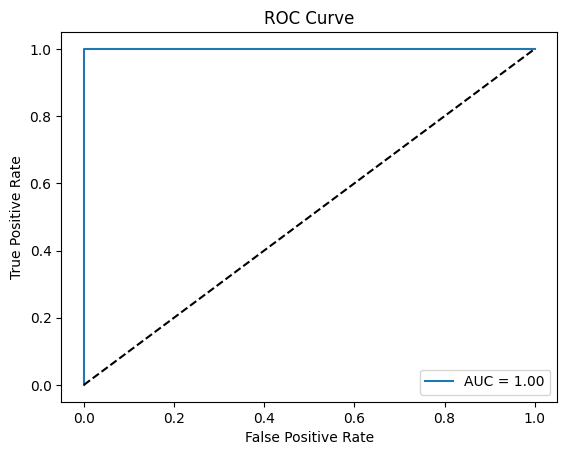

In [129]:
from sklearn.metrics import roc_curve, roc_auc_score
# Fit a logistic regression model on the training data
# model = LogisticRegression()
# model.fit(X_train, y_train)

# Predict probabilities for the testing data
probs = model.predict_proba(X_test)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
auc_score = roc_auc_score(y_test, probs[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

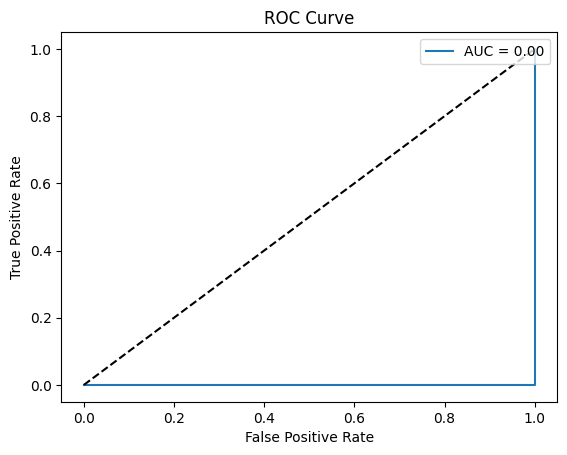

In [130]:
# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 0])
auc_score = roc_auc_score(y_test, probs[:, 0])

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper right')
plt.show()